# HRS Spectrometer Neutrol network Model

In [1]:
import  pandas as pd
import numpy as np
import sklearn
import math
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import *
import math

## Load the Training dataset
- Merge Multi dataset
- randomize the order of the dataset
- [ftp data server](http://localhost/Data/spectro_nn/)

In [2]:
dataSouceBaseDir = "http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5/"

files = ["{}/PRex_DataSet_Full_2239.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2240.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2241.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2244.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2245.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2256.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2257.csv".format(dataSouceBaseDir)
         ]

li = []
for filename in files:
    print("Loading file {}".format(filename))
    df = pd.read_csv(filename)
    li.append(df)
data = pd.concat(li)
data.sample(frac=1) # sample the data with fraction 1. rearrange the data in random order
data.head()

Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2239.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2240.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2241.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2244.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2245.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2256.csv
Loading file http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/order5//PRex_DataSet_Full_2257.csv


,evtID,runID,CutID,SieveRowID,SieveColID,bpmX,bpmY,x0th0y0ph0,x0th0y0ph1,x0th0y0ph2,...,x3th1y0ph1,x3th1y1ph0,x3th2y0ph0,x4th0y0ph0,x4th0y0ph1,x4th0y1ph0,x4th1y0ph0,x5th0y0ph0,targCalTh,targCalPh
0,0,2239,136,3,5,0.003794,-0.000501,1,-0.013557,0.000184,...,1.164170e-07,7.365750e-09,-8.548320e-06,1.769140e-07,-2.398430e-09,-1.517500e-10,1.761130e-07,-3.628280e-09,-0.000817,-0.010117
1,1,2239,130,4,4,0.003794,-0.000501,1,-0.024061,0.000579,...,1.323900e-06,1.839250e-07,-5.374350e-05,2.159530e-06,-5.195960e-08,-7.218600e-09,2.109290e-06,-8.278450e-08,0.019571,-0.012569
2,2,2239,179,4,11,0.003794,-0.000501,1,0.009713,0.000094,...,-7.098270e-08,1.959050e-07,-7.175640e-06,1.453270e-07,1.411530e-09,-3.895670e-09,1.426910e-07,-2.837480e-09,0.012775,0.014835
3,3,2239,142,2,6,0.003794,-0.000501,1,-0.009250,0.000086,...,3.297410e-08,3.171490e-08,-3.589400e-06,5.395920e-08,-4.991170e-10,-4.800570e-10,5.433150e-08,-8.223970e-10,-0.014409,-0.003863
4,4,2239,127,1,4,0.003794,-0.000501,1,-0.016968,0.000288,...,5.112200e-10,-9.458820e-12,-3.047970e-08,9.231640e-11,-1.566400e-12,2.898220e-14,9.339090e-11,-2.861530e-13,-0.021206,-0.012569


In [3]:
# print(data[data.runID.eq(2240)])

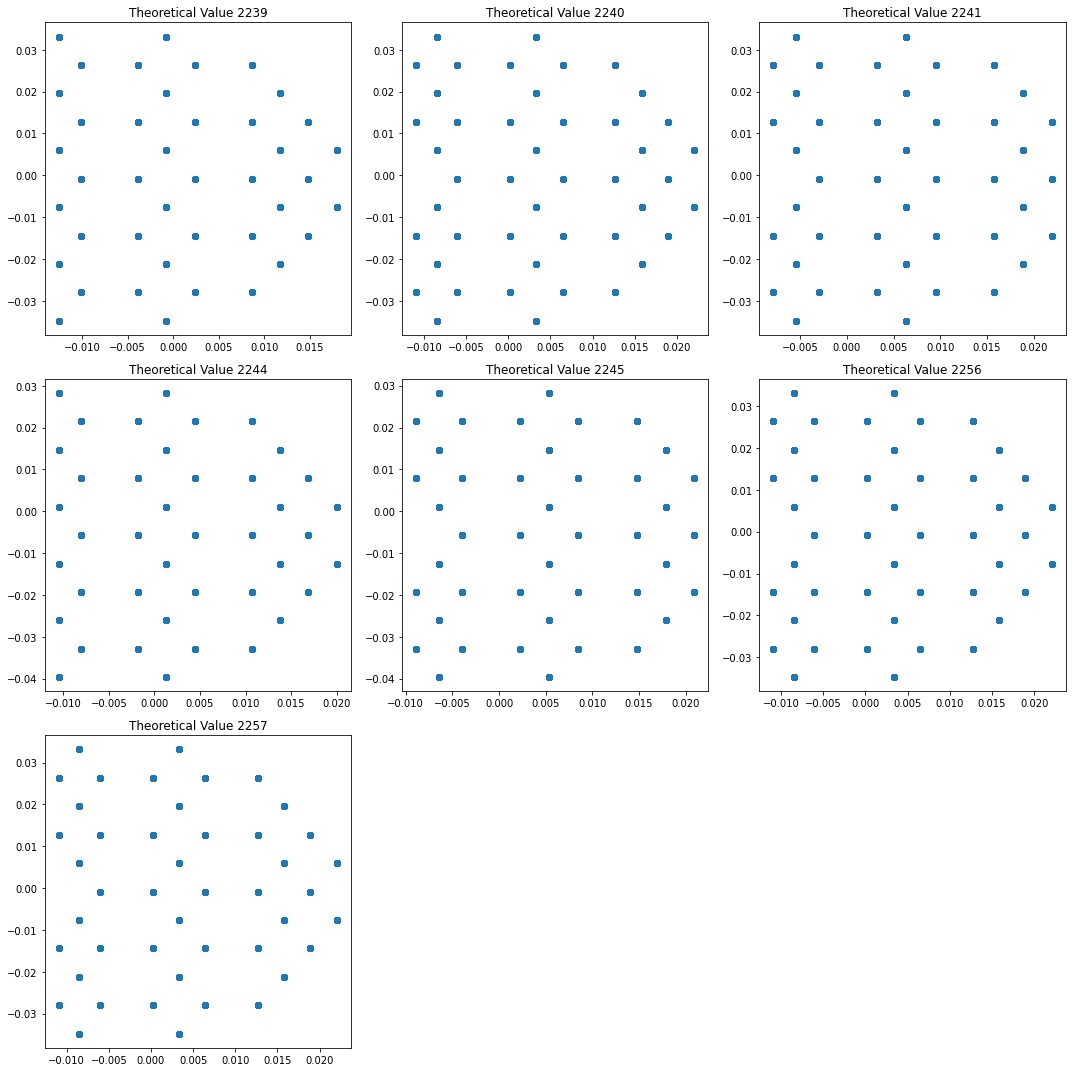

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=[15,15])
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[1, 1, 1])

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(data[data.runID.eq(2239)]["targCalPh"],data[data.runID.eq(2239)]["targCalTh"])
ax0.set_title('Theoretical Value 2239')

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(data[data.runID.eq(2240)]["targCalPh"],data[data.runID.eq(2240)]["targCalTh"])
ax1.set_title('Theoretical Value 2240')

ax2 = fig.add_subplot(gs[0, 2])
ax2.scatter(data[data.runID.eq(2241)]["targCalPh"],data[data.runID.eq(2241)]["targCalTh"])
ax2.set_title('Theoretical Value 2241')

ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(data[data.runID.eq(2244)]["targCalPh"],data[data.runID.eq(2244)]["targCalTh"])
ax3.set_title('Theoretical Value 2244')

ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(data[data.runID.eq(2245)]["targCalPh"],data[data.runID.eq(2245)]["targCalTh"])
ax4.set_title('Theoretical Value 2245')

ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(data[data.runID.eq(2256)]["targCalPh"],data[data.runID.eq(2256)]["targCalTh"])
ax5.set_title('Theoretical Value 2256')

ax6 = fig.add_subplot(gs[2, 0])
ax6.scatter(data[data.runID.eq(2257)]["targCalPh"],data[data.runID.eq(2257)]["targCalTh"])
ax6.set_title('Theoretical Value 2257')

plt.tight_layout()
plt.show()
# x = data[data.runID.eq(2241)]["targCalPh"]
# y = data[data.runID.eq(2241)]["targCalTh"]
# plt.scatter(x,y)
# plt.show()

# New Function Used for Train the X, and Y model seperately

## Prepare the Data

In [5]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

### 1. prepare the training data

(852391, 135)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(
    data.drop(labels=['evtID','runID','SieveRowID','SieveColID','CutID','bpmX','bpmY','targCalTh','targCalPh'], axis=1),
    data[['targCalTh','targCalPh']],
    test_size=0.2,
    random_state=0)

n_feature = train_X.shape[1]
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((681912, 126), (681912, 2), (170479, 126), (170479, 2))

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class OptNet(nn.Module):
    def __init__(self):
        super(OptNet,self).__init__()
        #TODO model, need to auto adapt to the training dataset
        self.fc1 = nn.Linear(n_feature, n_feature)  # 6*6 from image dimension
        # self.fc2 = nn.Linear(2*n_feature, n_feature)
        # self.fc3 = nn.Linear(n_feature, n_feature//2)
        # self.fc4 = nn.Linear(n_feature//2, n_feature//4)
        # self.fc5 = nn.Linear(n_feature//4, n_feature//8)
        self.output = nn.Linear(n_feature, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        # x = F.sigmoid(self.fc2(x))
        # x = F.sigmoid(self.fc3(x))
        # x = F.sigmoid(self.fc4(x))
        # x = F.sigmoid(self.fc5(x))
        x = self.output(x)
        return x



## Training on the $\theta_{targ}$

### 1. train the $\theta_{targ}$ model

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_trainTh = torch.tensor(train_X.to_numpy()).float().to(device)
y_trainTh = torch.tensor(train_y['targCalTh'].to_numpy()).float().to(device)
X_testTh  = torch.tensor(test_X.to_numpy()).float().to(device)
y_testTh  = torch.tensor(test_y['targCalTh'].to_numpy()).float().to(device)



In [9]:
import torch.optim as optim
thetaOptnet = OptNet()
thetaOptnet.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(thetaOptnet.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
for epoch in range(10):
    running_loss = 0.0
    for i in range(len(y_trainTh)):
        inputs = X_trainTh[i]
        labels = y_trainTh[i]
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = thetaOptnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d, %6f] loss: %.9f' %
                  (epoch + 1, i + 1, optimizer.param_groups[0]['lr'],running_loss / 2000))
            running_loss = 0.0
    torch.save(thetaOptnet.state_dict(), "./model_5_det/Theta_net_ep{}.pth".format(epoch))
    scheduler.step()

print("Finish Training Theta Parameters")
# save the training model
theta_model_PATH = './model_5_det/Theta_net.pth'
torch.save(thetaOptnet.state_dict(), theta_model_PATH)

/home/newdriver/Storage/HomeDir/Learning/spectrometer_nn/training_nn/venv/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/newdriver/Storage/HomeDir/Learning/spectrometer_nn/training_nn/venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,  2000, 0.100000] loss: 0.040705697
[1,  4000, 0.100000] loss: 0.000251457
[1,  6000, 0.100000] loss: 0.000105227
[1,  8000, 0.100000] loss: 0.000183897
[1, 10000, 0.100000] loss: 0.000244015
[1, 12000, 0.100000] loss: 0.000325497
[1, 14000, 0.100000] loss: 0.000677142
[1, 16000, 0.100000] loss: 0.001571185
[1, 18000, 0.100000] loss: 0.002773338
[1, 20000, 0.100000] loss: 0.001052087
[1, 22000, 0.100000] loss: 0.001104806
[1, 24000, 0.100000] loss: 0.001321177
[1, 26000, 0.100000] loss: 0.000914943
[1, 28000, 0.100000] loss: 0.001039300
[1, 30000, 0.100000] loss: 0.001010595
[1, 32000, 0.100000] loss: 0.001808499
[1, 34000, 0.100000] loss: 0.000908030
[1, 36000, 0.100000] loss: 0.000929976
[1, 38000, 0.100000] loss: 0.000991418
[1, 40000, 0.100000] loss: 0.000996389
[1, 42000, 0.100000] loss: 0.000907116
[1, 44000, 0.100000] loss: 0.000998949
[1, 46000, 0.100000] loss: 0.001026458
[1, 48000, 0.100000] loss: 0.001066906
[1, 50000, 0.100000] loss: 0.001138139
[1, 52000, 0.100000] loss

[1, 416000, 0.100000] loss: 0.000963530
[1, 418000, 0.100000] loss: 0.000919001
[1, 420000, 0.100000] loss: 0.000980589
[1, 422000, 0.100000] loss: 0.000963185
[1, 424000, 0.100000] loss: 0.001140441
[1, 426000, 0.100000] loss: 0.000958760
[1, 428000, 0.100000] loss: 0.000984303
[1, 430000, 0.100000] loss: 0.000940234
[1, 432000, 0.100000] loss: 0.000994482
[1, 434000, 0.100000] loss: 0.001042434
[1, 436000, 0.100000] loss: 0.000972823
[1, 438000, 0.100000] loss: 0.001016690
[1, 440000, 0.100000] loss: 0.001037387
[1, 442000, 0.100000] loss: 0.000940331
[1, 444000, 0.100000] loss: 0.000985828
[1, 446000, 0.100000] loss: 0.001046893
[1, 448000, 0.100000] loss: 0.000978544
[1, 450000, 0.100000] loss: 0.000891951
[1, 452000, 0.100000] loss: 0.000948571
[1, 454000, 0.100000] loss: 0.000941858
[1, 456000, 0.100000] loss: 0.000891021
[1, 458000, 0.100000] loss: 0.000919433
[1, 460000, 0.100000] loss: 0.000991052
[1, 462000, 0.100000] loss: 0.001012672
[1, 464000, 0.100000] loss: 0.000948802


[2, 150000, 0.010000] loss: 0.000046066
[2, 152000, 0.010000] loss: 0.000044565
[2, 154000, 0.010000] loss: 0.000048736
[2, 156000, 0.010000] loss: 0.000049214
[2, 158000, 0.010000] loss: 0.000049247
[2, 160000, 0.010000] loss: 0.000049889
[2, 162000, 0.010000] loss: 0.000046237
[2, 164000, 0.010000] loss: 0.000043640
[2, 166000, 0.010000] loss: 0.000050611
[2, 168000, 0.010000] loss: 0.000046879
[2, 170000, 0.010000] loss: 0.000048896
[2, 172000, 0.010000] loss: 0.000050743
[2, 174000, 0.010000] loss: 0.000047675
[2, 176000, 0.010000] loss: 0.000050756
[2, 178000, 0.010000] loss: 0.000044533
[2, 180000, 0.010000] loss: 0.000047410
[2, 182000, 0.010000] loss: 0.000044649
[2, 184000, 0.010000] loss: 0.000044011
[2, 186000, 0.010000] loss: 0.000044064
[2, 188000, 0.010000] loss: 0.000045988
[2, 190000, 0.010000] loss: 0.000046070
[2, 192000, 0.010000] loss: 0.000042991
[2, 194000, 0.010000] loss: 0.000043710
[2, 196000, 0.010000] loss: 0.000044944
[2, 198000, 0.010000] loss: 0.000052234


[2, 560000, 0.010000] loss: 0.000043149
[2, 562000, 0.010000] loss: 0.000039803
[2, 564000, 0.010000] loss: 0.000039509
[2, 566000, 0.010000] loss: 0.000039120
[2, 568000, 0.010000] loss: 0.000036346
[2, 570000, 0.010000] loss: 0.000040008
[2, 572000, 0.010000] loss: 0.000037430
[2, 574000, 0.010000] loss: 0.000038908
[2, 576000, 0.010000] loss: 0.000041186
[2, 578000, 0.010000] loss: 0.000039106
[2, 580000, 0.010000] loss: 0.000037221
[2, 582000, 0.010000] loss: 0.000039747
[2, 584000, 0.010000] loss: 0.000037731
[2, 586000, 0.010000] loss: 0.000034596
[2, 588000, 0.010000] loss: 0.000039511
[2, 590000, 0.010000] loss: 0.000039603
[2, 592000, 0.010000] loss: 0.000036907
[2, 594000, 0.010000] loss: 0.000034437
[2, 596000, 0.010000] loss: 0.000036950
[2, 598000, 0.010000] loss: 0.000037647
[2, 600000, 0.010000] loss: 0.000037013
[2, 602000, 0.010000] loss: 0.000034483
[2, 604000, 0.010000] loss: 0.000034197
[2, 606000, 0.010000] loss: 0.000039903
[2, 608000, 0.010000] loss: 0.000036961


[3, 294000, 0.001000] loss: 0.000011645
[3, 296000, 0.001000] loss: 0.000011087
[3, 298000, 0.001000] loss: 0.000013312
[3, 300000, 0.001000] loss: 0.000010656
[3, 302000, 0.001000] loss: 0.000012350
[3, 304000, 0.001000] loss: 0.000011874
[3, 306000, 0.001000] loss: 0.000011662
[3, 308000, 0.001000] loss: 0.000011296
[3, 310000, 0.001000] loss: 0.000011012
[3, 312000, 0.001000] loss: 0.000010959
[3, 314000, 0.001000] loss: 0.000011438
[3, 316000, 0.001000] loss: 0.000012596
[3, 318000, 0.001000] loss: 0.000010634
[3, 320000, 0.001000] loss: 0.000012564
[3, 322000, 0.001000] loss: 0.000011517
[3, 324000, 0.001000] loss: 0.000015826
[3, 326000, 0.001000] loss: 0.000012514
[3, 328000, 0.001000] loss: 0.000011660
[3, 330000, 0.001000] loss: 0.000012815
[3, 332000, 0.001000] loss: 0.000011372
[3, 334000, 0.001000] loss: 0.000010779
[3, 336000, 0.001000] loss: 0.000011199
[3, 338000, 0.001000] loss: 0.000010488
[3, 340000, 0.001000] loss: 0.000011797
[3, 342000, 0.001000] loss: 0.000011154


[4, 26000, 0.000100] loss: 0.000008360
[4, 28000, 0.000100] loss: 0.000008336
[4, 30000, 0.000100] loss: 0.000010313
[4, 32000, 0.000100] loss: 0.000007742
[4, 34000, 0.000100] loss: 0.000008133
[4, 36000, 0.000100] loss: 0.000008235
[4, 38000, 0.000100] loss: 0.000008370
[4, 40000, 0.000100] loss: 0.000008643
[4, 42000, 0.000100] loss: 0.000007672
[4, 44000, 0.000100] loss: 0.000008534
[4, 46000, 0.000100] loss: 0.000007609
[4, 48000, 0.000100] loss: 0.000007603
[4, 50000, 0.000100] loss: 0.000007874
[4, 52000, 0.000100] loss: 0.000010133
[4, 54000, 0.000100] loss: 0.000008425
[4, 56000, 0.000100] loss: 0.000009387
[4, 58000, 0.000100] loss: 0.000007573
[4, 60000, 0.000100] loss: 0.000007754
[4, 62000, 0.000100] loss: 0.000009671
[4, 64000, 0.000100] loss: 0.000008854
[4, 66000, 0.000100] loss: 0.000007538
[4, 68000, 0.000100] loss: 0.000008659
[4, 70000, 0.000100] loss: 0.000009441
[4, 72000, 0.000100] loss: 0.000009185
[4, 74000, 0.000100] loss: 0.000008098
[4, 76000, 0.000100] loss

[4, 438000, 0.000100] loss: 0.000007965
[4, 440000, 0.000100] loss: 0.000007939
[4, 442000, 0.000100] loss: 0.000007985
[4, 444000, 0.000100] loss: 0.000008540
[4, 446000, 0.000100] loss: 0.000008391
[4, 448000, 0.000100] loss: 0.000008866
[4, 450000, 0.000100] loss: 0.000007540
[4, 452000, 0.000100] loss: 0.000007281
[4, 454000, 0.000100] loss: 0.000009448
[4, 456000, 0.000100] loss: 0.000007772
[4, 458000, 0.000100] loss: 0.000009270
[4, 460000, 0.000100] loss: 0.000008273
[4, 462000, 0.000100] loss: 0.000007945
[4, 464000, 0.000100] loss: 0.000008845
[4, 466000, 0.000100] loss: 0.000008782
[4, 468000, 0.000100] loss: 0.000009110
[4, 470000, 0.000100] loss: 0.000008172
[4, 472000, 0.000100] loss: 0.000007455
[4, 474000, 0.000100] loss: 0.000008713
[4, 476000, 0.000100] loss: 0.000008565
[4, 478000, 0.000100] loss: 0.000007472
[4, 480000, 0.000100] loss: 0.000009579
[4, 482000, 0.000100] loss: 0.000007824
[4, 484000, 0.000100] loss: 0.000008057
[4, 486000, 0.000100] loss: 0.000007408


[5, 172000, 0.000010] loss: 0.000007808
[5, 174000, 0.000010] loss: 0.000007300
[5, 176000, 0.000010] loss: 0.000007712
[5, 178000, 0.000010] loss: 0.000008285
[5, 180000, 0.000010] loss: 0.000007825
[5, 182000, 0.000010] loss: 0.000007092
[5, 184000, 0.000010] loss: 0.000007359
[5, 186000, 0.000010] loss: 0.000006776
[5, 188000, 0.000010] loss: 0.000007674
[5, 190000, 0.000010] loss: 0.000008553
[5, 192000, 0.000010] loss: 0.000009898
[5, 194000, 0.000010] loss: 0.000007973
[5, 196000, 0.000010] loss: 0.000008152
[5, 198000, 0.000010] loss: 0.000008372
[5, 200000, 0.000010] loss: 0.000009450
[5, 202000, 0.000010] loss: 0.000008978
[5, 204000, 0.000010] loss: 0.000007042
[5, 206000, 0.000010] loss: 0.000007881
[5, 208000, 0.000010] loss: 0.000007876
[5, 210000, 0.000010] loss: 0.000009211
[5, 212000, 0.000010] loss: 0.000007539
[5, 214000, 0.000010] loss: 0.000007663
[5, 216000, 0.000010] loss: 0.000007599
[5, 218000, 0.000010] loss: 0.000009182
[5, 220000, 0.000010] loss: 0.000007613


[5, 582000, 0.000010] loss: 0.000007436
[5, 584000, 0.000010] loss: 0.000008111
[5, 586000, 0.000010] loss: 0.000006948
[5, 588000, 0.000010] loss: 0.000007805
[5, 590000, 0.000010] loss: 0.000007740
[5, 592000, 0.000010] loss: 0.000007720
[5, 594000, 0.000010] loss: 0.000007134
[5, 596000, 0.000010] loss: 0.000007627
[5, 598000, 0.000010] loss: 0.000007296
[5, 600000, 0.000010] loss: 0.000007450
[5, 602000, 0.000010] loss: 0.000006747
[5, 604000, 0.000010] loss: 0.000007046
[5, 606000, 0.000010] loss: 0.000007781
[5, 608000, 0.000010] loss: 0.000008407
[5, 610000, 0.000010] loss: 0.000008065
[5, 612000, 0.000010] loss: 0.000007643
[5, 614000, 0.000010] loss: 0.000007442
[5, 616000, 0.000010] loss: 0.000008410
[5, 618000, 0.000010] loss: 0.000008384
[5, 620000, 0.000010] loss: 0.000007344
[5, 622000, 0.000010] loss: 0.000008322
[5, 624000, 0.000010] loss: 0.000009779
[5, 626000, 0.000010] loss: 0.000007320
[5, 628000, 0.000010] loss: 0.000007286
[5, 630000, 0.000010] loss: 0.000008563


[6, 316000, 0.000001] loss: 0.000008537
[6, 318000, 0.000001] loss: 0.000007028
[6, 320000, 0.000001] loss: 0.000008661
[6, 322000, 0.000001] loss: 0.000007632
[6, 324000, 0.000001] loss: 0.000010274
[6, 326000, 0.000001] loss: 0.000009121
[6, 328000, 0.000001] loss: 0.000007540
[6, 330000, 0.000001] loss: 0.000009222
[6, 332000, 0.000001] loss: 0.000007583
[6, 334000, 0.000001] loss: 0.000007124
[6, 336000, 0.000001] loss: 0.000007515
[6, 338000, 0.000001] loss: 0.000007221
[6, 340000, 0.000001] loss: 0.000008069
[6, 342000, 0.000001] loss: 0.000007737
[6, 344000, 0.000001] loss: 0.000007193
[6, 346000, 0.000001] loss: 0.000008035
[6, 348000, 0.000001] loss: 0.000008190
[6, 350000, 0.000001] loss: 0.000008808
[6, 352000, 0.000001] loss: 0.000008810
[6, 354000, 0.000001] loss: 0.000006954
[6, 356000, 0.000001] loss: 0.000008782
[6, 358000, 0.000001] loss: 0.000008324
[6, 360000, 0.000001] loss: 0.000006875
[6, 362000, 0.000001] loss: 0.000008995
[6, 364000, 0.000001] loss: 0.000008459


[7, 48000, 0.000000] loss: 0.000007112
[7, 50000, 0.000000] loss: 0.000007390
[7, 52000, 0.000000] loss: 0.000009690
[7, 54000, 0.000000] loss: 0.000008002
[7, 56000, 0.000000] loss: 0.000009039
[7, 58000, 0.000000] loss: 0.000007114
[7, 60000, 0.000000] loss: 0.000007231
[7, 62000, 0.000000] loss: 0.000009268
[7, 64000, 0.000000] loss: 0.000008423
[7, 66000, 0.000000] loss: 0.000007104
[7, 68000, 0.000000] loss: 0.000008229
[7, 70000, 0.000000] loss: 0.000009148
[7, 72000, 0.000000] loss: 0.000008764
[7, 74000, 0.000000] loss: 0.000007650
[7, 76000, 0.000000] loss: 0.000008534
[7, 78000, 0.000000] loss: 0.000007457
[7, 80000, 0.000000] loss: 0.000007264
[7, 82000, 0.000000] loss: 0.000007415
[7, 84000, 0.000000] loss: 0.000007727
[7, 86000, 0.000000] loss: 0.000008455
[7, 88000, 0.000000] loss: 0.000008689
[7, 90000, 0.000000] loss: 0.000008716
[7, 92000, 0.000000] loss: 0.000007931
[7, 94000, 0.000000] loss: 0.000008340
[7, 96000, 0.000000] loss: 0.000008146
[7, 98000, 0.000000] loss

[7, 460000, 0.000000] loss: 0.000007884
[7, 462000, 0.000000] loss: 0.000007525
[7, 464000, 0.000000] loss: 0.000008528
[7, 466000, 0.000000] loss: 0.000008443
[7, 468000, 0.000000] loss: 0.000008847
[7, 470000, 0.000000] loss: 0.000007846
[7, 472000, 0.000000] loss: 0.000007126
[7, 474000, 0.000000] loss: 0.000008372
[7, 476000, 0.000000] loss: 0.000008220
[7, 478000, 0.000000] loss: 0.000007099
[7, 480000, 0.000000] loss: 0.000009260
[7, 482000, 0.000000] loss: 0.000007506
[7, 484000, 0.000000] loss: 0.000007666
[7, 486000, 0.000000] loss: 0.000007104
[7, 488000, 0.000000] loss: 0.000008464
[7, 490000, 0.000000] loss: 0.000008047
[7, 492000, 0.000000] loss: 0.000008125
[7, 494000, 0.000000] loss: 0.000007886
[7, 496000, 0.000000] loss: 0.000007426
[7, 498000, 0.000000] loss: 0.000008022
[7, 500000, 0.000000] loss: 0.000008118
[7, 502000, 0.000000] loss: 0.000008264
[7, 504000, 0.000000] loss: 0.000007894
[7, 506000, 0.000000] loss: 0.000007309
[7, 508000, 0.000000] loss: 0.000007250


[8, 194000, 0.000000] loss: 0.000007952
[8, 196000, 0.000000] loss: 0.000008112
[8, 198000, 0.000000] loss: 0.000008345
[8, 200000, 0.000000] loss: 0.000009451
[8, 202000, 0.000000] loss: 0.000008935
[8, 204000, 0.000000] loss: 0.000006984
[8, 206000, 0.000000] loss: 0.000007829
[8, 208000, 0.000000] loss: 0.000007835
[8, 210000, 0.000000] loss: 0.000009171
[8, 212000, 0.000000] loss: 0.000007493
[8, 214000, 0.000000] loss: 0.000007617
[8, 216000, 0.000000] loss: 0.000007568
[8, 218000, 0.000000] loss: 0.000009165
[8, 220000, 0.000000] loss: 0.000007571
[8, 222000, 0.000000] loss: 0.000008045
[8, 224000, 0.000000] loss: 0.000007976
[8, 226000, 0.000000] loss: 0.000007419
[8, 228000, 0.000000] loss: 0.000007765
[8, 230000, 0.000000] loss: 0.000007057
[8, 232000, 0.000000] loss: 0.000007897
[8, 234000, 0.000000] loss: 0.000007143
[8, 236000, 0.000000] loss: 0.000008507
[8, 238000, 0.000000] loss: 0.000007255
[8, 240000, 0.000000] loss: 0.000008096
[8, 242000, 0.000000] loss: 0.000008815


[8, 604000, 0.000000] loss: 0.000007021
[8, 606000, 0.000000] loss: 0.000007742
[8, 608000, 0.000000] loss: 0.000008367
[8, 610000, 0.000000] loss: 0.000008038
[8, 612000, 0.000000] loss: 0.000007606
[8, 614000, 0.000000] loss: 0.000007431
[8, 616000, 0.000000] loss: 0.000008366
[8, 618000, 0.000000] loss: 0.000008334
[8, 620000, 0.000000] loss: 0.000007315
[8, 622000, 0.000000] loss: 0.000008284
[8, 624000, 0.000000] loss: 0.000009724
[8, 626000, 0.000000] loss: 0.000007303
[8, 628000, 0.000000] loss: 0.000007250
[8, 630000, 0.000000] loss: 0.000008515
[8, 632000, 0.000000] loss: 0.000008040
[8, 634000, 0.000000] loss: 0.000008225
[8, 636000, 0.000000] loss: 0.000007761
[8, 638000, 0.000000] loss: 0.000007612
[8, 640000, 0.000000] loss: 0.000007200
[8, 642000, 0.000000] loss: 0.000009916
[8, 644000, 0.000000] loss: 0.000008037
[8, 646000, 0.000000] loss: 0.000007524
[8, 648000, 0.000000] loss: 0.000007577
[8, 650000, 0.000000] loss: 0.000008312
[8, 652000, 0.000000] loss: 0.000007080


[9, 338000, 0.000000] loss: 0.000007218
[9, 340000, 0.000000] loss: 0.000008065
[9, 342000, 0.000000] loss: 0.000007730
[9, 344000, 0.000000] loss: 0.000007189
[9, 346000, 0.000000] loss: 0.000008027
[9, 348000, 0.000000] loss: 0.000008188
[9, 350000, 0.000000] loss: 0.000008808
[9, 352000, 0.000000] loss: 0.000008808
[9, 354000, 0.000000] loss: 0.000006950
[9, 356000, 0.000000] loss: 0.000008774
[9, 358000, 0.000000] loss: 0.000008318
[9, 360000, 0.000000] loss: 0.000006872
[9, 362000, 0.000000] loss: 0.000008990
[9, 364000, 0.000000] loss: 0.000008458
[9, 366000, 0.000000] loss: 0.000008242
[9, 368000, 0.000000] loss: 0.000008342
[9, 370000, 0.000000] loss: 0.000008430
[9, 372000, 0.000000] loss: 0.000007288
[9, 374000, 0.000000] loss: 0.000007425
[9, 376000, 0.000000] loss: 0.000007472
[9, 378000, 0.000000] loss: 0.000007816
[9, 380000, 0.000000] loss: 0.000008110
[9, 382000, 0.000000] loss: 0.000007594
[9, 384000, 0.000000] loss: 0.000007657
[9, 386000, 0.000000] loss: 0.000008237


[10, 68000, 0.000000] loss: 0.000008229
[10, 70000, 0.000000] loss: 0.000009147
[10, 72000, 0.000000] loss: 0.000008764
[10, 74000, 0.000000] loss: 0.000007650
[10, 76000, 0.000000] loss: 0.000008532
[10, 78000, 0.000000] loss: 0.000007456
[10, 80000, 0.000000] loss: 0.000007264
[10, 82000, 0.000000] loss: 0.000007414
[10, 84000, 0.000000] loss: 0.000007725
[10, 86000, 0.000000] loss: 0.000008456
[10, 88000, 0.000000] loss: 0.000008689
[10, 90000, 0.000000] loss: 0.000008717
[10, 92000, 0.000000] loss: 0.000007931
[10, 94000, 0.000000] loss: 0.000008337
[10, 96000, 0.000000] loss: 0.000008146
[10, 98000, 0.000000] loss: 0.000007678
[10, 100000, 0.000000] loss: 0.000007776
[10, 102000, 0.000000] loss: 0.000007633
[10, 104000, 0.000000] loss: 0.000006648
[10, 106000, 0.000000] loss: 0.000008284
[10, 108000, 0.000000] loss: 0.000008327
[10, 110000, 0.000000] loss: 0.000008262
[10, 112000, 0.000000] loss: 0.000009426
[10, 114000, 0.000000] loss: 0.000006984
[10, 116000, 0.000000] loss: 0.0

[10, 470000, 0.000000] loss: 0.000007845
[10, 472000, 0.000000] loss: 0.000007125
[10, 474000, 0.000000] loss: 0.000008372
[10, 476000, 0.000000] loss: 0.000008221
[10, 478000, 0.000000] loss: 0.000007099
[10, 480000, 0.000000] loss: 0.000009264
[10, 482000, 0.000000] loss: 0.000007502
[10, 484000, 0.000000] loss: 0.000007667
[10, 486000, 0.000000] loss: 0.000007102
[10, 488000, 0.000000] loss: 0.000008462
[10, 490000, 0.000000] loss: 0.000008053
[10, 492000, 0.000000] loss: 0.000008121
[10, 494000, 0.000000] loss: 0.000007888
[10, 496000, 0.000000] loss: 0.000007430
[10, 498000, 0.000000] loss: 0.000008018
[10, 500000, 0.000000] loss: 0.000008120
[10, 502000, 0.000000] loss: 0.000008267
[10, 504000, 0.000000] loss: 0.000007893
[10, 506000, 0.000000] loss: 0.000007313
[10, 508000, 0.000000] loss: 0.000007243
[10, 510000, 0.000000] loss: 0.000007745
[10, 512000, 0.000000] loss: 0.000007271
[10, 514000, 0.000000] loss: 0.000006945
[10, 516000, 0.000000] loss: 0.000010197
[10, 518000, 0.0

## Training on the $\phi_{targ}$

### 2. train the $\phi_{targ}$ model

In [10]:
X_trainPh = torch.tensor(train_X.to_numpy()).float()
y_trainPh = torch.tensor(train_y['targCalPh'].to_numpy()).float()
X_testPh  = torch.tensor(test_X.to_numpy()).float()
y_testPh  = torch.tensor(test_y['targCalPh'].to_numpy()).float()

In [11]:
phiOptnet = OptNet()
phiOptnet.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(phiOptnet.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
for epoch in range(8):
    running_loss = 0.0
    for i in range(len(y_trainPh)):
        inputs = X_trainPh[i].to(device)
        labels = y_trainPh[i].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs =  phiOptnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d, %6f] loss: %.9f' %
                  (epoch + 1, i + 1, optimizer.param_groups[0]['lr'],running_loss / 2000))
            running_loss = 0.0
    torch.save(thetaOptnet.state_dict(), "./model_5_det/Phi_net_ep{}.pth".format(epoch))
    scheduler.step()

print("Finish Training Theta Parameters")
# save the training model
phi_model_PATH = './model_5_det/Phi_net.pth'
torch.save(phiOptnet.state_dict(), phi_model_PATH)


[1,  2000, 0.100000] loss: 0.034707621
[1,  4000, 0.100000] loss: 0.000152610
[1,  6000, 0.100000] loss: 0.000208338
[1,  8000, 0.100000] loss: 0.000265090
[1, 10000, 0.100000] loss: 0.000150526
[1, 12000, 0.100000] loss: 0.000156021
[1, 14000, 0.100000] loss: 0.000243682
[1, 16000, 0.100000] loss: 0.000331034
[1, 18000, 0.100000] loss: 0.000433225
[1, 20000, 0.100000] loss: 0.000762181
[1, 22000, 0.100000] loss: 0.000283619
[1, 24000, 0.100000] loss: 0.000271906
[1, 26000, 0.100000] loss: 0.000295854
[1, 28000, 0.100000] loss: 0.000296167
[1, 30000, 0.100000] loss: 0.000303154
[1, 32000, 0.100000] loss: 0.000277183
[1, 34000, 0.100000] loss: 0.000339187
[1, 36000, 0.100000] loss: 0.000293771
[1, 38000, 0.100000] loss: 0.000290965
[1, 40000, 0.100000] loss: 0.000275671
[1, 42000, 0.100000] loss: 0.000384326
[1, 44000, 0.100000] loss: 0.000275400
[1, 46000, 0.100000] loss: 0.000286183
[1, 48000, 0.100000] loss: 0.000299415
[1, 50000, 0.100000] loss: 0.000321561
[1, 52000, 0.100000] loss

[1, 416000, 0.100000] loss: 0.000327692
[1, 418000, 0.100000] loss: 0.000297805
[1, 420000, 0.100000] loss: 0.000285391
[1, 422000, 0.100000] loss: 0.000296894
[1, 424000, 0.100000] loss: 0.000330228
[1, 426000, 0.100000] loss: 0.000285126
[1, 428000, 0.100000] loss: 0.000323421
[1, 430000, 0.100000] loss: 0.000313357
[1, 432000, 0.100000] loss: 0.000288111
[1, 434000, 0.100000] loss: 0.000283627
[1, 436000, 0.100000] loss: 0.000311126
[1, 438000, 0.100000] loss: 0.000271954
[1, 440000, 0.100000] loss: 0.000330119
[1, 442000, 0.100000] loss: 0.000332689
[1, 444000, 0.100000] loss: 0.000348006
[1, 446000, 0.100000] loss: 0.000271933
[1, 448000, 0.100000] loss: 0.000316490
[1, 450000, 0.100000] loss: 0.000281280
[1, 452000, 0.100000] loss: 0.000275604
[1, 454000, 0.100000] loss: 0.000289984
[1, 456000, 0.100000] loss: 0.000305874
[1, 458000, 0.100000] loss: 0.000303258
[1, 460000, 0.100000] loss: 0.000293365
[1, 462000, 0.100000] loss: 0.000297228
[1, 464000, 0.100000] loss: 0.000269790


[2, 150000, 0.010000] loss: 0.000011699
[2, 152000, 0.010000] loss: 0.000010413
[2, 154000, 0.010000] loss: 0.000010071
[2, 156000, 0.010000] loss: 0.000010674
[2, 158000, 0.010000] loss: 0.000010479
[2, 160000, 0.010000] loss: 0.000009735
[2, 162000, 0.010000] loss: 0.000010020
[2, 164000, 0.010000] loss: 0.000011254
[2, 166000, 0.010000] loss: 0.000009838
[2, 168000, 0.010000] loss: 0.000008455
[2, 170000, 0.010000] loss: 0.000008769
[2, 172000, 0.010000] loss: 0.000009417
[2, 174000, 0.010000] loss: 0.000008695
[2, 176000, 0.010000] loss: 0.000008981
[2, 178000, 0.010000] loss: 0.000009589
[2, 180000, 0.010000] loss: 0.000008977
[2, 182000, 0.010000] loss: 0.000008434
[2, 184000, 0.010000] loss: 0.000008762
[2, 186000, 0.010000] loss: 0.000009611
[2, 188000, 0.010000] loss: 0.000009892
[2, 190000, 0.010000] loss: 0.000008871
[2, 192000, 0.010000] loss: 0.000009376
[2, 194000, 0.010000] loss: 0.000009642
[2, 196000, 0.010000] loss: 0.000008987
[2, 198000, 0.010000] loss: 0.000009484


[2, 560000, 0.010000] loss: 0.000007680
[2, 562000, 0.010000] loss: 0.000008436
[2, 564000, 0.010000] loss: 0.000008056
[2, 566000, 0.010000] loss: 0.000009054
[2, 568000, 0.010000] loss: 0.000008450
[2, 570000, 0.010000] loss: 0.000007810
[2, 572000, 0.010000] loss: 0.000008545
[2, 574000, 0.010000] loss: 0.000007291
[2, 576000, 0.010000] loss: 0.000007629
[2, 578000, 0.010000] loss: 0.000008120
[2, 580000, 0.010000] loss: 0.000007019
[2, 582000, 0.010000] loss: 0.000007635
[2, 584000, 0.010000] loss: 0.000006739
[2, 586000, 0.010000] loss: 0.000008253
[2, 588000, 0.010000] loss: 0.000008244
[2, 590000, 0.010000] loss: 0.000008123
[2, 592000, 0.010000] loss: 0.000007506
[2, 594000, 0.010000] loss: 0.000008215
[2, 596000, 0.010000] loss: 0.000007552
[2, 598000, 0.010000] loss: 0.000008877
[2, 600000, 0.010000] loss: 0.000008681
[2, 602000, 0.010000] loss: 0.000007324
[2, 604000, 0.010000] loss: 0.000008446
[2, 606000, 0.010000] loss: 0.000007529
[2, 608000, 0.010000] loss: 0.000008329


[3, 294000, 0.001000] loss: 0.000002572
[3, 296000, 0.001000] loss: 0.000002485
[3, 298000, 0.001000] loss: 0.000002507
[3, 300000, 0.001000] loss: 0.000002426
[3, 302000, 0.001000] loss: 0.000002432
[3, 304000, 0.001000] loss: 0.000002461
[3, 306000, 0.001000] loss: 0.000002559
[3, 308000, 0.001000] loss: 0.000002399
[3, 310000, 0.001000] loss: 0.000002565
[3, 312000, 0.001000] loss: 0.000002604
[3, 314000, 0.001000] loss: 0.000002470
[3, 316000, 0.001000] loss: 0.000002445
[3, 318000, 0.001000] loss: 0.000002535
[3, 320000, 0.001000] loss: 0.000002488
[3, 322000, 0.001000] loss: 0.000002442
[3, 324000, 0.001000] loss: 0.000002361
[3, 326000, 0.001000] loss: 0.000002550
[3, 328000, 0.001000] loss: 0.000002587
[3, 330000, 0.001000] loss: 0.000002405
[3, 332000, 0.001000] loss: 0.000002319
[3, 334000, 0.001000] loss: 0.000002558
[3, 336000, 0.001000] loss: 0.000002572
[3, 338000, 0.001000] loss: 0.000002387
[3, 340000, 0.001000] loss: 0.000002647
[3, 342000, 0.001000] loss: 0.000002410


[4, 26000, 0.000100] loss: 0.000001812
[4, 28000, 0.000100] loss: 0.000001889
[4, 30000, 0.000100] loss: 0.000001737
[4, 32000, 0.000100] loss: 0.000001748
[4, 34000, 0.000100] loss: 0.000001879
[4, 36000, 0.000100] loss: 0.000001890
[4, 38000, 0.000100] loss: 0.000001902
[4, 40000, 0.000100] loss: 0.000001879
[4, 42000, 0.000100] loss: 0.000001869
[4, 44000, 0.000100] loss: 0.000001905
[4, 46000, 0.000100] loss: 0.000001852
[4, 48000, 0.000100] loss: 0.000001992
[4, 50000, 0.000100] loss: 0.000001833
[4, 52000, 0.000100] loss: 0.000001801
[4, 54000, 0.000100] loss: 0.000001766
[4, 56000, 0.000100] loss: 0.000001924
[4, 58000, 0.000100] loss: 0.000001914
[4, 60000, 0.000100] loss: 0.000002012
[4, 62000, 0.000100] loss: 0.000002027
[4, 64000, 0.000100] loss: 0.000001907
[4, 66000, 0.000100] loss: 0.000001793
[4, 68000, 0.000100] loss: 0.000001904
[4, 70000, 0.000100] loss: 0.000001852
[4, 72000, 0.000100] loss: 0.000001900
[4, 74000, 0.000100] loss: 0.000001845
[4, 76000, 0.000100] loss

[4, 438000, 0.000100] loss: 0.000001864
[4, 440000, 0.000100] loss: 0.000001926
[4, 442000, 0.000100] loss: 0.000001866
[4, 444000, 0.000100] loss: 0.000001931
[4, 446000, 0.000100] loss: 0.000001932
[4, 448000, 0.000100] loss: 0.000001765
[4, 450000, 0.000100] loss: 0.000001864
[4, 452000, 0.000100] loss: 0.000001746
[4, 454000, 0.000100] loss: 0.000001929
[4, 456000, 0.000100] loss: 0.000001845
[4, 458000, 0.000100] loss: 0.000001927
[4, 460000, 0.000100] loss: 0.000001902
[4, 462000, 0.000100] loss: 0.000001851
[4, 464000, 0.000100] loss: 0.000001874
[4, 466000, 0.000100] loss: 0.000001845
[4, 468000, 0.000100] loss: 0.000001882
[4, 470000, 0.000100] loss: 0.000001871
[4, 472000, 0.000100] loss: 0.000001827
[4, 474000, 0.000100] loss: 0.000001839
[4, 476000, 0.000100] loss: 0.000001906
[4, 478000, 0.000100] loss: 0.000001840
[4, 480000, 0.000100] loss: 0.000001955
[4, 482000, 0.000100] loss: 0.000001879
[4, 484000, 0.000100] loss: 0.000001876
[4, 486000, 0.000100] loss: 0.000001807


[5, 172000, 0.000010] loss: 0.000001746
[5, 174000, 0.000010] loss: 0.000001794
[5, 176000, 0.000010] loss: 0.000001754
[5, 178000, 0.000010] loss: 0.000001813
[5, 180000, 0.000010] loss: 0.000001800
[5, 182000, 0.000010] loss: 0.000001785
[5, 184000, 0.000010] loss: 0.000001761
[5, 186000, 0.000010] loss: 0.000001706
[5, 188000, 0.000010] loss: 0.000001731
[5, 190000, 0.000010] loss: 0.000001766
[5, 192000, 0.000010] loss: 0.000001850
[5, 194000, 0.000010] loss: 0.000001845
[5, 196000, 0.000010] loss: 0.000001828
[5, 198000, 0.000010] loss: 0.000001815
[5, 200000, 0.000010] loss: 0.000001834
[5, 202000, 0.000010] loss: 0.000001737
[5, 204000, 0.000010] loss: 0.000001792
[5, 206000, 0.000010] loss: 0.000001691
[5, 208000, 0.000010] loss: 0.000001776
[5, 210000, 0.000010] loss: 0.000001731
[5, 212000, 0.000010] loss: 0.000001842
[5, 214000, 0.000010] loss: 0.000001868
[5, 216000, 0.000010] loss: 0.000001883
[5, 218000, 0.000010] loss: 0.000001720
[5, 220000, 0.000010] loss: 0.000001749


[5, 582000, 0.000010] loss: 0.000001670
[5, 584000, 0.000010] loss: 0.000001707
[5, 586000, 0.000010] loss: 0.000001721
[5, 588000, 0.000010] loss: 0.000001845
[5, 590000, 0.000010] loss: 0.000001700
[5, 592000, 0.000010] loss: 0.000001743
[5, 594000, 0.000010] loss: 0.000001907
[5, 596000, 0.000010] loss: 0.000001797
[5, 598000, 0.000010] loss: 0.000001796
[5, 600000, 0.000010] loss: 0.000001924
[5, 602000, 0.000010] loss: 0.000001752
[5, 604000, 0.000010] loss: 0.000001817
[5, 606000, 0.000010] loss: 0.000001723
[5, 608000, 0.000010] loss: 0.000001760
[5, 610000, 0.000010] loss: 0.000001721
[5, 612000, 0.000010] loss: 0.000001846
[5, 614000, 0.000010] loss: 0.000001882
[5, 616000, 0.000010] loss: 0.000001803
[5, 618000, 0.000010] loss: 0.000001761
[5, 620000, 0.000010] loss: 0.000001903
[5, 622000, 0.000010] loss: 0.000001805
[5, 624000, 0.000010] loss: 0.000001767
[5, 626000, 0.000010] loss: 0.000001705
[5, 628000, 0.000010] loss: 0.000001823
[5, 630000, 0.000010] loss: 0.000001736


[6, 316000, 0.000001] loss: 0.000001795
[6, 318000, 0.000001] loss: 0.000001804
[6, 320000, 0.000001] loss: 0.000001782
[6, 322000, 0.000001] loss: 0.000001767
[6, 324000, 0.000001] loss: 0.000001655
[6, 326000, 0.000001] loss: 0.000001787
[6, 328000, 0.000001] loss: 0.000001792
[6, 330000, 0.000001] loss: 0.000001706
[6, 332000, 0.000001] loss: 0.000001746
[6, 334000, 0.000001] loss: 0.000001824
[6, 336000, 0.000001] loss: 0.000001805
[6, 338000, 0.000001] loss: 0.000001573
[6, 340000, 0.000001] loss: 0.000001753
[6, 342000, 0.000001] loss: 0.000001759
[6, 344000, 0.000001] loss: 0.000001707
[6, 346000, 0.000001] loss: 0.000001719
[6, 348000, 0.000001] loss: 0.000001815
[6, 350000, 0.000001] loss: 0.000001839
[6, 352000, 0.000001] loss: 0.000001789
[6, 354000, 0.000001] loss: 0.000001782
[6, 356000, 0.000001] loss: 0.000001778
[6, 358000, 0.000001] loss: 0.000001708
[6, 360000, 0.000001] loss: 0.000001685
[6, 362000, 0.000001] loss: 0.000001860
[6, 364000, 0.000001] loss: 0.000001803


[7, 48000, 0.000000] loss: 0.000001899
[7, 50000, 0.000000] loss: 0.000001747
[7, 52000, 0.000000] loss: 0.000001715
[7, 54000, 0.000000] loss: 0.000001707
[7, 56000, 0.000000] loss: 0.000001856
[7, 58000, 0.000000] loss: 0.000001808
[7, 60000, 0.000000] loss: 0.000001915
[7, 62000, 0.000000] loss: 0.000001946
[7, 64000, 0.000000] loss: 0.000001800
[7, 66000, 0.000000] loss: 0.000001717
[7, 68000, 0.000000] loss: 0.000001826
[7, 70000, 0.000000] loss: 0.000001779
[7, 72000, 0.000000] loss: 0.000001815
[7, 74000, 0.000000] loss: 0.000001763
[7, 76000, 0.000000] loss: 0.000001805
[7, 78000, 0.000000] loss: 0.000001796
[7, 80000, 0.000000] loss: 0.000001711
[7, 82000, 0.000000] loss: 0.000001769
[7, 84000, 0.000000] loss: 0.000001760
[7, 86000, 0.000000] loss: 0.000001765
[7, 88000, 0.000000] loss: 0.000001759
[7, 90000, 0.000000] loss: 0.000001849
[7, 92000, 0.000000] loss: 0.000001696
[7, 94000, 0.000000] loss: 0.000001849
[7, 96000, 0.000000] loss: 0.000001704
[7, 98000, 0.000000] loss

[7, 460000, 0.000000] loss: 0.000001811
[7, 462000, 0.000000] loss: 0.000001745
[7, 464000, 0.000000] loss: 0.000001797
[7, 466000, 0.000000] loss: 0.000001758
[7, 468000, 0.000000] loss: 0.000001800
[7, 470000, 0.000000] loss: 0.000001781
[7, 472000, 0.000000] loss: 0.000001744
[7, 474000, 0.000000] loss: 0.000001745
[7, 476000, 0.000000] loss: 0.000001836
[7, 478000, 0.000000] loss: 0.000001760
[7, 480000, 0.000000] loss: 0.000001870
[7, 482000, 0.000000] loss: 0.000001793
[7, 484000, 0.000000] loss: 0.000001782
[7, 486000, 0.000000] loss: 0.000001721
[7, 488000, 0.000000] loss: 0.000001792
[7, 490000, 0.000000] loss: 0.000001825
[7, 492000, 0.000000] loss: 0.000001783
[7, 494000, 0.000000] loss: 0.000001710
[7, 496000, 0.000000] loss: 0.000001728
[7, 498000, 0.000000] loss: 0.000001724
[7, 500000, 0.000000] loss: 0.000001786
[7, 502000, 0.000000] loss: 0.000001791
[7, 504000, 0.000000] loss: 0.000001660
[7, 506000, 0.000000] loss: 0.000001755
[7, 508000, 0.000000] loss: 0.000001767


[8, 194000, 0.000000] loss: 0.000001841
[8, 196000, 0.000000] loss: 0.000001816
[8, 198000, 0.000000] loss: 0.000001805
[8, 200000, 0.000000] loss: 0.000001826
[8, 202000, 0.000000] loss: 0.000001733
[8, 204000, 0.000000] loss: 0.000001783
[8, 206000, 0.000000] loss: 0.000001683
[8, 208000, 0.000000] loss: 0.000001766
[8, 210000, 0.000000] loss: 0.000001720
[8, 212000, 0.000000] loss: 0.000001833
[8, 214000, 0.000000] loss: 0.000001859
[8, 216000, 0.000000] loss: 0.000001874
[8, 218000, 0.000000] loss: 0.000001715
[8, 220000, 0.000000] loss: 0.000001740
[8, 222000, 0.000000] loss: 0.000001716
[8, 224000, 0.000000] loss: 0.000001734
[8, 226000, 0.000000] loss: 0.000001666
[8, 228000, 0.000000] loss: 0.000001791
[8, 230000, 0.000000] loss: 0.000001811
[8, 232000, 0.000000] loss: 0.000001830
[8, 234000, 0.000000] loss: 0.000001847
[8, 236000, 0.000000] loss: 0.000001812
[8, 238000, 0.000000] loss: 0.000001718
[8, 240000, 0.000000] loss: 0.000001813
[8, 242000, 0.000000] loss: 0.000001803


[8, 604000, 0.000000] loss: 0.000001808
[8, 606000, 0.000000] loss: 0.000001718
[8, 608000, 0.000000] loss: 0.000001751
[8, 610000, 0.000000] loss: 0.000001717
[8, 612000, 0.000000] loss: 0.000001833
[8, 614000, 0.000000] loss: 0.000001874
[8, 616000, 0.000000] loss: 0.000001798
[8, 618000, 0.000000] loss: 0.000001750
[8, 620000, 0.000000] loss: 0.000001889
[8, 622000, 0.000000] loss: 0.000001793
[8, 624000, 0.000000] loss: 0.000001758
[8, 626000, 0.000000] loss: 0.000001694
[8, 628000, 0.000000] loss: 0.000001817
[8, 630000, 0.000000] loss: 0.000001734
[8, 632000, 0.000000] loss: 0.000001787
[8, 634000, 0.000000] loss: 0.000001762
[8, 636000, 0.000000] loss: 0.000001745
[8, 638000, 0.000000] loss: 0.000001748
[8, 640000, 0.000000] loss: 0.000001790
[8, 642000, 0.000000] loss: 0.000001804
[8, 644000, 0.000000] loss: 0.000001815
[8, 646000, 0.000000] loss: 0.000001771
[8, 648000, 0.000000] loss: 0.000001734
[8, 650000, 0.000000] loss: 0.000001864
[8, 652000, 0.000000] loss: 0.000001691


[9, 338000, 0.000000] loss: 0.000001572
[9, 340000, 0.000000] loss: 0.000001752
[9, 342000, 0.000000] loss: 0.000001758
[9, 344000, 0.000000] loss: 0.000001706
[9, 346000, 0.000000] loss: 0.000001719
[9, 348000, 0.000000] loss: 0.000001813
[9, 350000, 0.000000] loss: 0.000001843
[9, 352000, 0.000000] loss: 0.000001788
[9, 354000, 0.000000] loss: 0.000001782
[9, 356000, 0.000000] loss: 0.000001777
[9, 358000, 0.000000] loss: 0.000001706
[9, 360000, 0.000000] loss: 0.000001683
[9, 362000, 0.000000] loss: 0.000001859
[9, 364000, 0.000000] loss: 0.000001802
[9, 366000, 0.000000] loss: 0.000001744
[9, 368000, 0.000000] loss: 0.000001684
[9, 370000, 0.000000] loss: 0.000001720
[9, 372000, 0.000000] loss: 0.000001793
[9, 374000, 0.000000] loss: 0.000001707
[9, 376000, 0.000000] loss: 0.000001746
[9, 378000, 0.000000] loss: 0.000001750
[9, 380000, 0.000000] loss: 0.000001775
[9, 382000, 0.000000] loss: 0.000001775
[9, 384000, 0.000000] loss: 0.000001732
[9, 386000, 0.000000] loss: 0.000001828


[10, 68000, 0.000000] loss: 0.000001826
[10, 70000, 0.000000] loss: 0.000001781
[10, 72000, 0.000000] loss: 0.000001813
[10, 74000, 0.000000] loss: 0.000001763
[10, 76000, 0.000000] loss: 0.000001805
[10, 78000, 0.000000] loss: 0.000001795
[10, 80000, 0.000000] loss: 0.000001712
[10, 82000, 0.000000] loss: 0.000001770
[10, 84000, 0.000000] loss: 0.000001760
[10, 86000, 0.000000] loss: 0.000001765
[10, 88000, 0.000000] loss: 0.000001758
[10, 90000, 0.000000] loss: 0.000001849
[10, 92000, 0.000000] loss: 0.000001696
[10, 94000, 0.000000] loss: 0.000001850
[10, 96000, 0.000000] loss: 0.000001704
[10, 98000, 0.000000] loss: 0.000001747
[10, 100000, 0.000000] loss: 0.000001806
[10, 102000, 0.000000] loss: 0.000001716
[10, 104000, 0.000000] loss: 0.000001739
[10, 106000, 0.000000] loss: 0.000001776
[10, 108000, 0.000000] loss: 0.000001761
[10, 110000, 0.000000] loss: 0.000001781
[10, 112000, 0.000000] loss: 0.000001837
[10, 114000, 0.000000] loss: 0.000001694
[10, 116000, 0.000000] loss: 0.0

[10, 470000, 0.000000] loss: 0.000001781
[10, 472000, 0.000000] loss: 0.000001744
[10, 474000, 0.000000] loss: 0.000001745
[10, 476000, 0.000000] loss: 0.000001836
[10, 478000, 0.000000] loss: 0.000001760
[10, 480000, 0.000000] loss: 0.000001870
[10, 482000, 0.000000] loss: 0.000001793
[10, 484000, 0.000000] loss: 0.000001782
[10, 486000, 0.000000] loss: 0.000001721
[10, 488000, 0.000000] loss: 0.000001792
[10, 490000, 0.000000] loss: 0.000001826
[10, 492000, 0.000000] loss: 0.000001783
[10, 494000, 0.000000] loss: 0.000001709
[10, 496000, 0.000000] loss: 0.000001728
[10, 498000, 0.000000] loss: 0.000001723
[10, 500000, 0.000000] loss: 0.000001786
[10, 502000, 0.000000] loss: 0.000001791
[10, 504000, 0.000000] loss: 0.000001659
[10, 506000, 0.000000] loss: 0.000001756
[10, 508000, 0.000000] loss: 0.000001766
[10, 510000, 0.000000] loss: 0.000001774
[10, 512000, 0.000000] loss: 0.000001765
[10, 514000, 0.000000] loss: 0.000001767
[10, 516000, 0.000000] loss: 0.000001776
[10, 518000, 0.0

## Test the Training model

### 1. Seperate Test on the $\theta$ and $\phi$ on the test dataset
-

In [12]:
# phi_model_PATH = './model/Phi_net.pth'
# theta_model_PATH = './model/Theta_net.pth'

testNet_theta = OptNet()
testNet_theta.to(device)
testNet_theta.load_state_dict(torch.load(theta_model_PATH))

test_loss = 0
mseArr = []

with torch.no_grad():
    for i in range(len(y_testTh)):
        positions = X_testTh[i]
        labels = y_testTh[i]

        outputs = testNet_theta(positions)
        loss = criterion(outputs,labels)
        test_loss += loss
        mseArr.append(loss)
print('test_error is :{}   / {}'.format(test_loss,sum(mseArr)/len(mseArr)))

test_error is :1.3651446104049683   / 8.007699761947151e-06


In [13]:
testNet_phi = OptNet()
testNet_phi.to(device)
testNet_phi.load_state_dict(torch.load(phi_model_PATH))

test_loss = 0
mseArr = []
with torch.no_grad():
    for i in range(len(y_testPh)):
        positions = X_testPh[i].to(device)
        labels = y_testPh[i].to(device)
        outputs = testNet_phi(positions)
        loss = criterion(outputs,labels)
        test_loss += loss
        mseArr.append(loss)
print('test_error is :{}   / {}'.format(test_loss,sum(mseArr)/len(mseArr)))

test_error is :0.30363643169403076   / 1.7810782537708292e-06


### 2.2D histogram distribution test (Include all the training and test dataset)

In [14]:
def predictor(model_path,x_test):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net = OptNet()
    net.load_state_dict(torch.load(model_path))
    net.to(device)
    res = torch.empty(0)
    with torch.no_grad():
        for i in range(len(x_test)):
            positions = x_test[i].to(device)
            outputs = net(positions).cpu()
            res = torch.cat((res,outputs))
    return res

/home/newdriver/Storage/HomeDir/Learning/spectrometer_nn/training_nn/venv/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-15-8fb4a14eb692>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicPh'] =phi.numpy()
<ipython-input-15-8fb4a14eb692>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicTh'] 

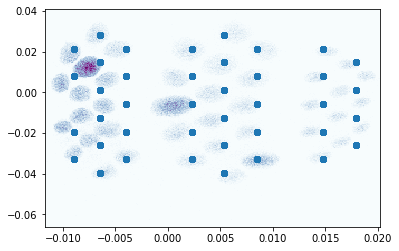

In [15]:
alldatadf = data[data.runID.eq(2245)]
# get the theta and phi dimension and get the predictions
alldata = alldatadf.drop(labels=['evtID','runID','SieveRowID','SieveColID','CutID','bpmX','bpmY','targCalTh','targCalPh'], axis=1)

alldatatensor = torch.tensor(alldata.to_numpy()).float()

theta = predictor(theta_model_PATH,alldatatensor)
phi   = predictor(phi_model_PATH,alldatatensor)

alldatadf['predicPh'] =phi.numpy()
alldatadf['predicTh'] =theta.numpy()
alldatadf['residuTh'] = alldatadf['predicTh'] -alldatadf['targCalTh']
alldatadf['residuPh'] = alldatadf['predicPh'] -alldatadf['targCalPh']

plt.hist2d(alldatadf['predicPh'],alldatadf['predicTh'],bins=300,cmap=plt.cm.BuPu)
plt.scatter(alldatadf['targCalPh'],alldatadf['targCalTh'])
plt.show()

/home/newdriver/Storage/HomeDir/Learning/spectrometer_nn/training_nn/venv/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-16-72c3ea5de047>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicPh'] =phi.numpy()
<ipython-input-16-72c3ea5de047>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicTh'] 

<ipython-input-16-72c3ea5de047>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicPh'] =phi.numpy()
<ipython-input-16-72c3ea5de047>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldatadf['predicTh'] =theta.numpy()
<ipython-input-16-72c3ea5de047>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

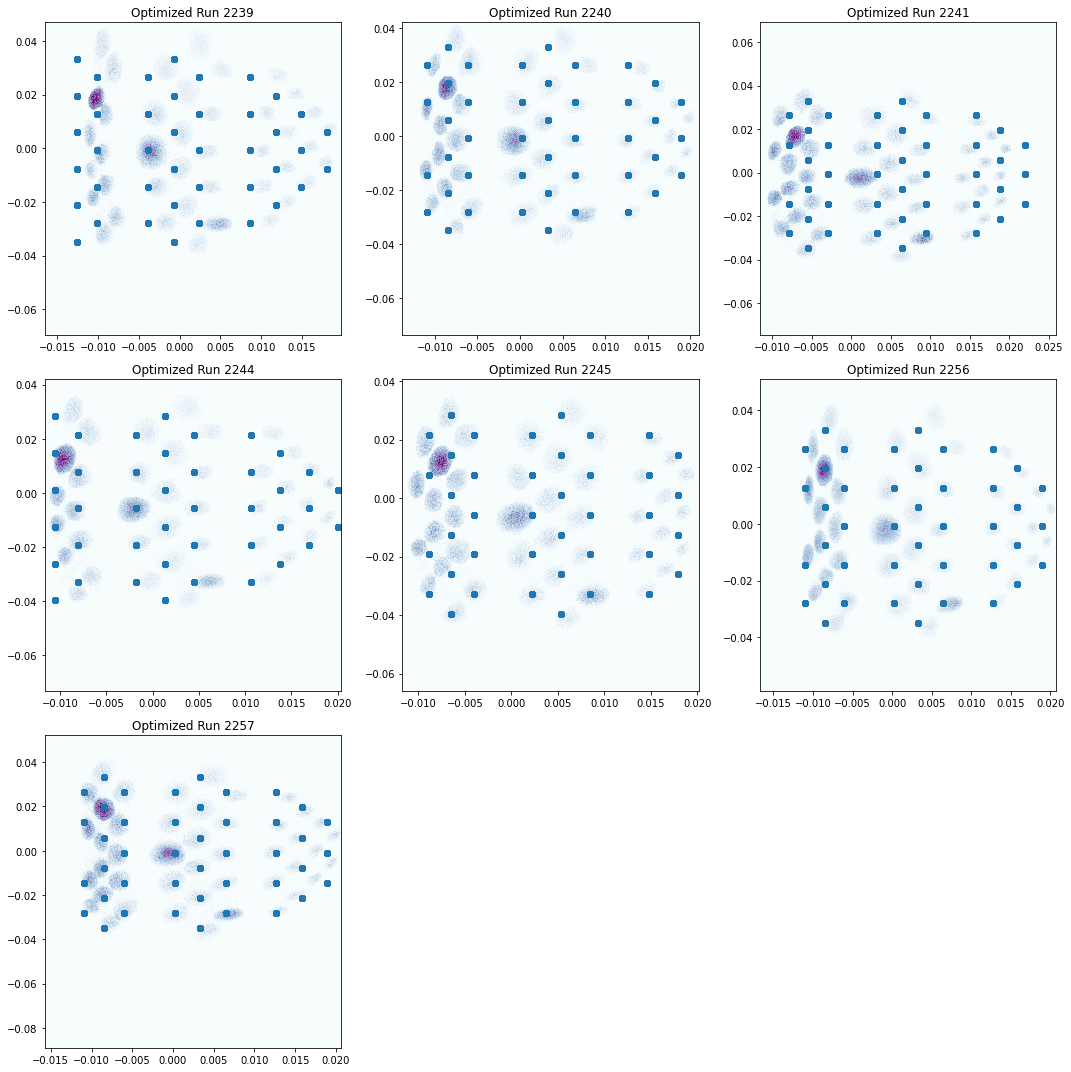

In [16]:
fig = plt.figure(figsize=[15,15])
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[1, 1, 1])

plotArr  = {gs[0,0]:2239, gs[0,1]:2240,gs[0,2]:2241,gs[1,0]:2244,gs[1,1]:2245,gs[1,2]:2256,gs[2,0]:2257}
subplot ={}
for key, runID in plotArr.items():
    alldatadf = data[data.runID.eq(runID)]
    # get the theta and phi dimension and get the predictions
    alldata = alldatadf.drop(labels=['evtID','runID','SieveRowID','SieveColID','CutID','bpmX','bpmY','targCalTh','targCalPh'], axis=1)
    alldatatensor = torch.tensor(alldata.to_numpy()).float()
    theta = predictor(theta_model_PATH,alldatatensor)
    phi   = predictor(phi_model_PATH,alldatatensor)
    alldatadf['predicPh'] =phi.numpy()
    alldatadf['predicTh'] =theta.numpy()
    alldatadf['residuTh'] = alldatadf['predicTh'] -alldatadf['targCalTh']
    alldatadf['residuPh'] = alldatadf['predicPh'] -alldatadf['targCalPh']

    subplot[runID] =fig.add_subplot(key)
    subplot[runID].hist2d(alldatadf['predicPh'],alldatadf['predicTh'],bins=300,cmap=plt.cm.BuPu)
    subplot[runID].scatter(alldatadf['targCalPh'],alldatadf['targCalTh'])
    subplot[runID].set_title("Optimized Run {}".format(runID))
plt.tight_layout()
plt.show()

### Plot the residual plot

In [19]:
plt.savefig("unequal.jpg")

<Figure size 432x288 with 0 Axes>